In [3]:
import numpy
import imageio
import pygad
import matplotlib.pyplot
import numpy
import functools
import operator

In [4]:
"""
GARI (Genetic Algorithm for Reproducing Images) is a Python project that uses the PyGAD library for reproducing images using the genetic algorithm.
GARI reproduces a single image using Genetic Algorithm (GA) by evolving pixel values.
For implementing the genetic algorithm, the PyGAD library is used.
Check its documentation here: https://pygad.readthedocs.io
This project works with both color and gray images without any modifications.
This project is implemented using Python 3.5 by Ahmed Fawzy Gad.
"""

def img2chromosome(img_arr):
    """
    Represents the image as a 1D vector.
    
    img_arr: The image to be converted into a vector.
    
    Returns the vector.
    """

    return numpy.reshape(a=img_arr, newshape=(functools.reduce(operator.mul, img_arr.shape)))


In [5]:
def chromosome2img(vector, shape):
    """
    Converts a 1D vector into an array.
    
    vector: The vector to be converted into an array.
    shape: The shape of the target array.
    
    Returns the array.
    """

    # Check if the vector can be reshaped according to the specified shape.
    if len(vector) != functools.reduce(operator.mul, shape):
        raise ValueError("A vector of length {vector_length} into an array of shape {shape}.".format(vector_length=len(vector), shape=shape))

    return numpy.reshape(a=vector, newshape=shape)

In [6]:
def fitness_fun(solution, solution_idx):
    """
    Calculating the fitness value for a solution in the population.
    The fitness value is calculated using the sum of absolute difference between genes values in the original and reproduced chromosomes.
    
    solution: Current solution in the population to calculate its fitness.
    solution_idx: Index of the solution within the population.
    """

    fitness = numpy.sum(numpy.abs(target_chromosome-solution))

    # Negating the fitness value to make it increasing rather than decreasing.
    fitness = numpy.sum(target_chromosome) - fitness
    return fitness

In [7]:
def callback(ga_instance):
    print("Generation = {gen}".format(gen=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))

    if ga_instance.generations_completed % 500 == 0:
        matplotlib.pyplot.imsave('test/solution_'+str(ga_instance.generations_completed)+'.png', 
        chromosome2img(ga_instance.best_solution()[0], target_im.shape))

In [ ]:
# Reading target image to be reproduced using Genetic Algorithm (GA).
target_im = imageio.imread('fruit.jpg') # https://github.com/ahmedfgad/GARI/blob/master/fruit.jpg
target_im = numpy.asarray(target_im/255, dtype=numpy.float)

# Target image after enconding. Value encoding is used.
target_chromosome = img2chromosome(target_im)

In [10]:
ga_instance = pygad.GA(num_generations=20000,
                       num_parents_mating=10,
                       fitness_func=fitness_fun,
                       sol_per_pop=20,
                       num_genes=target_im.size,
                       init_range_low=0.0,
                       init_range_high=1.0,
                       mutation_percent_genes=0.01,
                       mutation_type="random",
                       mutation_by_replacement=True,
                       random_mutation_min_val=0.0,
                       random_mutation_max_val=1.0,
                       callback_generation=callback)

ga_instance.run()

c:\nik\woodbury\S22-CSMA213\github\.venv\lib\site-packages\pygad\pygad.py:731: UserWarning: Starting from PyGAD 2.6.0, the callback_generation parameter is deprecated and will be removed in a later release of PyGAD. Please use the on_generation parameter instead.
  if not self.suppress_warnings: warnings.warn("Starting from PyGAD 2.6.0, the callback_generation parameter is deprecated and will be removed in a later release of PyGAD. Please use the on_generation parameter instead.")


Generation = 1
Fitness    = 30066.075306507584
Generation = 2
Fitness    = 30066.075306507584
Generation = 3
Fitness    = 30141.344805650304
Generation = 4
Fitness    = 30144.46929669603
Generation = 5
Fitness    = 30144.46929669603
Generation = 6
Fitness    = 30144.46929669603
Generation = 7
Fitness    = 30144.46929669603
Generation = 8
Fitness    = 30146.098028040695
Generation = 9
Fitness    = 30146.132239353552
Generation = 10
Fitness    = 30146.90892464608
Generation = 11
Fitness    = 30148.124024847537
Generation = 12
Fitness    = 30148.61509848853
Generation = 13
Fitness    = 30149.2480808591
Generation = 14
Fitness    = 30150.07840438778
Generation = 15
Fitness    = 30151.442700680513
Generation = 16
Fitness    = 30151.915655758727
Generation = 17
Fitness    = 30152.721669803475
Generation = 18
Fitness    = 30153.13398166676
Generation = 19
Fitness    = 30154.042895039995
Generation = 20
Fitness    = 30154.997303574106
Generation = 21
Fitness    = 30156.34366228806
Generation =

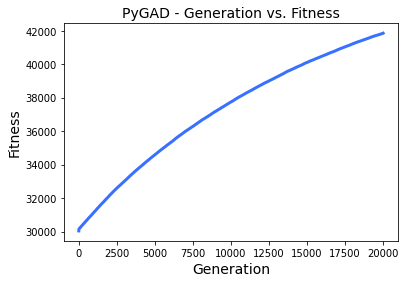

Fitness value of the best solution = 41846.41141977184
Index of the best solution : 0
Best fitness value reached after 19999 generations.


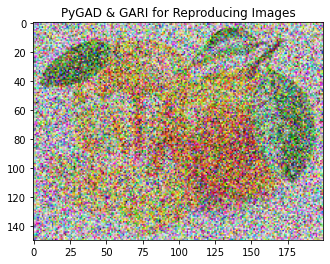

In [12]:
# After the generations complete, some plots are showed that summarize the how the outputs/fitenss values evolve over generations.
ga_instance.plot_fitness()

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

result = chromosome2img(solution, target_im.shape)

matplotlib.pyplot.imshow(result)
matplotlib.pyplot.title("PyGAD & GARI for Reproducing Images")
matplotlib.pyplot.show()